## 1. Welcome to the world of data science
<p>Throughout the world of data science, there are many languages and tools that can be used to complete a given task. While you are often able to use whichever tool you prefer, it is often important for analysts to work with similar platforms so that they can share their code with one another. Learning what professionals in the data science industry use while at work can help you gain a better understanding of things that you may be asked to do in the future. </p>
<p>In this project, we are going to find out what tools and languages professionals use in their day-to-day work. Our data comes from the <a href="https://www.kaggle.com/kaggle/kaggle-survey-2017?utm_medium=partner&utm_source=datacamp.com&utm_campaign=ml+survey+case+study">Kaggle Data Science Survey</a> which includes responses from over 10,000 people that write code to analyze data in their daily work. </p>

In [175]:
# Loading necessary packages
library(tidyverse)
# Loading the data
responses <- read_csv("datasets/kagglesurvey.csv")

# Printing the first 10 rows
head(responses, 10)

Parsed with column specification:
cols(
  Respondent = col_integer(),
  WorkToolsSelect = col_character(),
  LanguageRecommendationSelect = col_character(),
  EmployerIndustry = col_character(),
  WorkAlgorithmsSelect = col_character()
)


Respondent,WorkToolsSelect,LanguageRecommendationSelect,EmployerIndustry,WorkAlgorithmsSelect
1,"Amazon Web services,Oracle Data Mining/ Oracle R Enterprise,Perl",F#,Internet-based,"Neural Networks,Random Forests,RNNs"
2,"Amazon Machine Learning,Amazon Web services,Cloudera,Hadoop/Hive/Pig,Impala,Java,Mathematica,MATLAB/Octave,Microsoft Excel Data Mining,Microsoft SQL Server Data Mining,NoSQL,Python,R,SAS Base,SAS JMP,SQL,Tableau",Python,Mix of fields,"Bayesian Techniques,Decision Trees,Random Forests,Regression/Logistic Regression"
3,"C/C++,Jupyter notebooks,MATLAB/Octave,Python,R,TensorFlow",Python,Technology,"Bayesian Techniques,CNNs,Ensemble Methods,Neural Networks,Regression/Logistic Regression,SVMs"
4,"Jupyter notebooks,Python,SQL,TensorFlow",Python,Academic,"Bayesian Techniques,CNNs,Decision Trees,Gradient Boosted Machines,Neural Networks,Random Forests,Regression/Logistic Regression"
5,"C/C++,Cloudera,Hadoop/Hive/Pig,Java,NoSQL,R,Unix shell / awk",R,Government,NA
6,SQL,Python,Non-profit,NA
7,"Jupyter notebooks,NoSQL,Python,R,SQL,Unix shell / awk",Python,Internet-based,"CNNs,Decision Trees,Gradient Boosted Machines,Random Forests,Regression/Logistic Regression,SVMs"
8,"Python,Spark / MLlib,Tableau,TensorFlow,Other",Python,Mix of fields,"Bayesian Techniques,CNNs,HMMs,Neural Networks,Random Forests,Regression/Logistic Regression,SVMs"
9,"Jupyter notebooks,MATLAB/Octave,Python,SAS Base,SQL",Python,Financial,"Ensemble Methods,Gradient Boosted Machines"
10,"C/C++,IBM Cognos,MATLAB/Octave,Microsoft Excel Data Mining,Microsoft R Server (Formerly Revolution Analytics),Microsoft SQL Server Data Mining,Perl,Python,R,SQL,Unix shell / awk",R,Technology,"Bayesian Techniques,Regression/Logistic Regression"


## 2. Using multiple tools
<p>Now that we've loaded in the survey results, we want to focus on the tools and languages that the survey respondents use at work. </p>

In [177]:
# Printing the first respondents' tools and languages
responses %>%
    filter(Respondent == 1)%>%
    print(WorkToolsSelect)
# Creating a new data frame called tools
tools <- responses

# Adding a new column to tools which splits the WorkToolsSelect column at the commas and unnests the new column
tools <- tools %>% 
    mutate(work_tools = strsplit(WorkToolsSelect, ","))%>%
    unnest(work_tools)

# Viewing the first 6 rows of tools
head(tools)

# A tibble: 1 x 5
  Respondent WorkToolsSelect LanguageRecomme~ EmployerIndustry WorkAlgorithmsS~
       <int> <chr>           <chr>            <chr>            <chr>           
1          1 Amazon Web ser~ F#               Internet-based   Neural Networks~


Respondent,WorkToolsSelect,LanguageRecommendationSelect,EmployerIndustry,WorkAlgorithmsSelect,work_tools
1,"Amazon Web services,Oracle Data Mining/ Oracle R Enterprise,Perl",F#,Internet-based,"Neural Networks,Random Forests,RNNs",Amazon Web services
1,"Amazon Web services,Oracle Data Mining/ Oracle R Enterprise,Perl",F#,Internet-based,"Neural Networks,Random Forests,RNNs",Oracle Data Mining/ Oracle R Enterprise
1,"Amazon Web services,Oracle Data Mining/ Oracle R Enterprise,Perl",F#,Internet-based,"Neural Networks,Random Forests,RNNs",Perl
2,"Amazon Machine Learning,Amazon Web services,Cloudera,Hadoop/Hive/Pig,Impala,Java,Mathematica,MATLAB/Octave,Microsoft Excel Data Mining,Microsoft SQL Server Data Mining,NoSQL,Python,R,SAS Base,SAS JMP,SQL,Tableau",Python,Mix of fields,"Bayesian Techniques,Decision Trees,Random Forests,Regression/Logistic Regression",Amazon Machine Learning
2,"Amazon Machine Learning,Amazon Web services,Cloudera,Hadoop/Hive/Pig,Impala,Java,Mathematica,MATLAB/Octave,Microsoft Excel Data Mining,Microsoft SQL Server Data Mining,NoSQL,Python,R,SAS Base,SAS JMP,SQL,Tableau",Python,Mix of fields,"Bayesian Techniques,Decision Trees,Random Forests,Regression/Logistic Regression",Amazon Web services
2,"Amazon Machine Learning,Amazon Web services,Cloudera,Hadoop/Hive/Pig,Impala,Java,Mathematica,MATLAB/Octave,Microsoft Excel Data Mining,Microsoft SQL Server Data Mining,NoSQL,Python,R,SAS Base,SAS JMP,SQL,Tableau",Python,Mix of fields,"Bayesian Techniques,Decision Trees,Random Forests,Regression/Logistic Regression",Cloudera


## 3. Counting users of each tool
<p>Now that we've split apart all of the tools used by each respondent, we can figure out which tools are the most popular.</p>

In [179]:
# Creating a new data frame
tool_count <- tools

# Grouping the data by work_tools, calculate the number of responses in each group
tool_count <- tool_count  %>% 
    group_by(work_tools)  %>% 
    summarise(count = n())

# Sorting tool_count so that the most popular tools are at the top
tool_count = tool_count %>%
    arrange(desc(count))
# Printing the first 6 results
head(tool_count)

work_tools,count
Python,6073
R,4708
SQL,4261
Jupyter notebooks,3206
TensorFlow,2256
NA,2198


## 4. Plotting the most popular tools
<p>Let's see how your favorite tools stack up against the rest. </p>

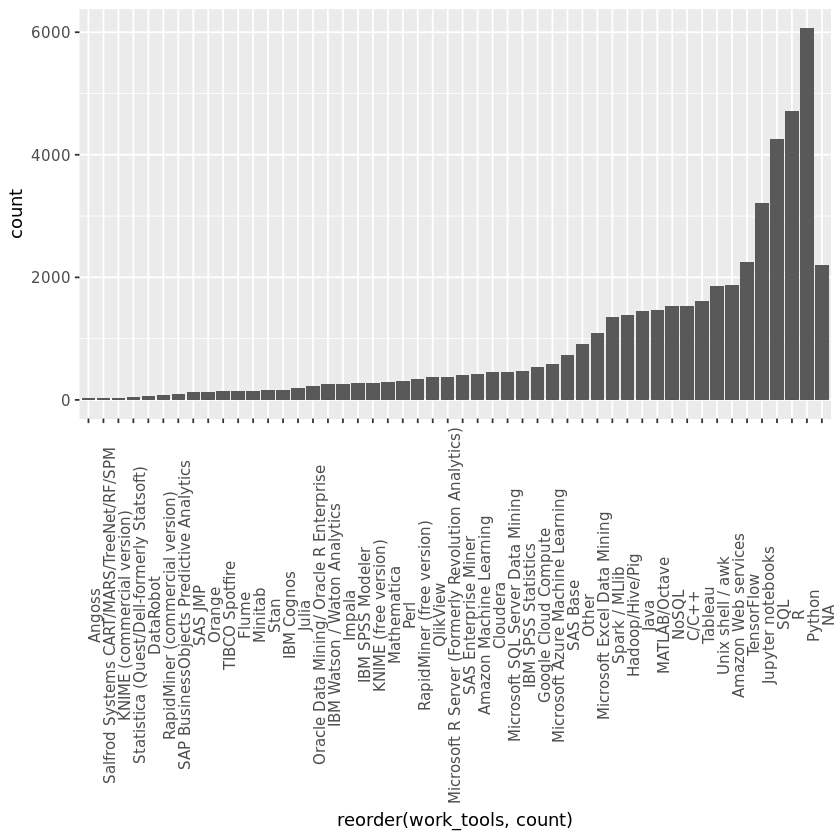

In [181]:
# Creating a bar chart of the work_tools column. 
# Arranging the bars so that the tallest are on the far right
ggplot(tool_count, aes(x = reorder(work_tools, count), y = count)) + 
    geom_bar(stat="identity") +

# Rotating the bar labels 90 degrees
    theme(axis.text.x = element_text(angle = 90))

## 5. The R vs Python debate
<p>Within the field of data science, there is a lot of debate among professionals about whether R or Python should reign supreme. You can see from our last figure that R and Python are the two most commonly used languages, but it's possible that many respondents use both R and Python. Let's take a look at how many people use R, Python, and both tools.</p>

In [183]:
# Creating a new data frame called debate_tools
debate_tools <- responses

# Creating a new column called language preference, based on the conditions specified in the Instructions
debate_tools <- debate_tools  %>% 
   mutate(language_preference = case_when(
       grepl("R", WorkToolsSelect) & grepl("Python", WorkToolsSelect) ~ "both",
       grepl("R", WorkToolsSelect) & !grepl("Python", WorkToolsSelect) ~ "R",
       !grepl("R", WorkToolsSelect) & grepl("Python", WorkToolsSelect) ~ "Python",
       !grepl("R", WorkToolsSelect) & !grepl("Python", WorkToolsSelect) ~ "neither",
    )
  )

# Printing the first 6 rows
head(debate_tools)

Respondent,WorkToolsSelect,LanguageRecommendationSelect,EmployerIndustry,WorkAlgorithmsSelect,language_preference
1,"Amazon Web services,Oracle Data Mining/ Oracle R Enterprise,Perl",F#,Internet-based,"Neural Networks,Random Forests,RNNs",R
2,"Amazon Machine Learning,Amazon Web services,Cloudera,Hadoop/Hive/Pig,Impala,Java,Mathematica,MATLAB/Octave,Microsoft Excel Data Mining,Microsoft SQL Server Data Mining,NoSQL,Python,R,SAS Base,SAS JMP,SQL,Tableau",Python,Mix of fields,"Bayesian Techniques,Decision Trees,Random Forests,Regression/Logistic Regression",both
3,"C/C++,Jupyter notebooks,MATLAB/Octave,Python,R,TensorFlow",Python,Technology,"Bayesian Techniques,CNNs,Ensemble Methods,Neural Networks,Regression/Logistic Regression,SVMs",both
4,"Jupyter notebooks,Python,SQL,TensorFlow",Python,Academic,"Bayesian Techniques,CNNs,Decision Trees,Gradient Boosted Machines,Neural Networks,Random Forests,Regression/Logistic Regression",Python
5,"C/C++,Cloudera,Hadoop/Hive/Pig,Java,NoSQL,R,Unix shell / awk",R,Government,NA,R
6,SQL,Python,Non-profit,NA,neither


## 6. Plotting R vs Python users
<p>Now we just need to take a closer look at how many respondents use R, Python, and both!</p>

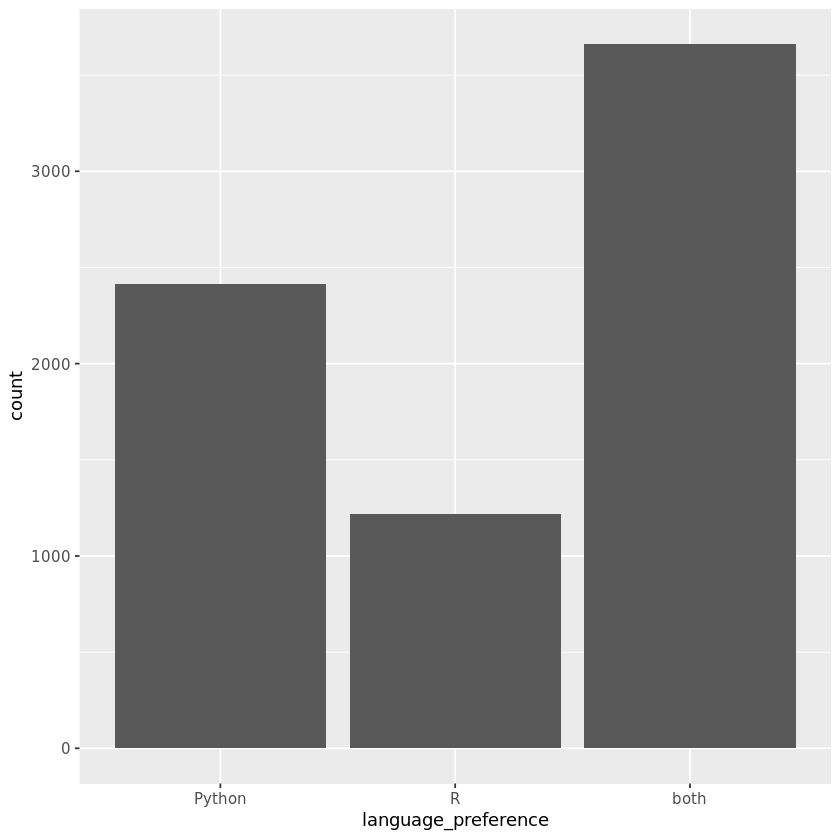

In [185]:
# Creating a new data frame
debate_plot <- debate_tools

# Grouping by language preference and calculate number of responses
debate_plot <- debate_plot  %>% 
   group_by(language_preference)  %>% 
    summarise(count = n())  %>% 

# Removing the row for users of "neither"
    filter(language_preference != "neither")

# Creating a bar chart
ggplot(debate_plot, aes(language_preference, count))+
    geom_bar(stat = "identity")

## 7. Language recommendations
<p>It looks like the largest group of professionals program in both Python and R. But what happens when they are asked which language they recommend to new learners? Do R lovers always recommend R? </p>

In [187]:
# Creating a new data frame
recommendations <- debate_tools

# Grouping by language_preference and then LanguageRecommendationSelect
recommendations <- recommendations  %>% 
    group_by(language_preference, LanguageRecommendationSelect)  %>% 
    summarise(count = n())%>%

# Removing empty responses and include the top recommendations
    arrange(desc(count))%>%
    filter(row_number() <= 4)
head(recommendations)

language_preference,LanguageRecommendationSelect,count
neither,NA,2348
both,Python,1917
Python,Python,1742
both,R,912
R,R,632
both,NA,591


## 8. The most recommended language by the language used
<p>Just one thing left. Let's graphically determine which languages are most recommended based on the language that a person uses.</p>

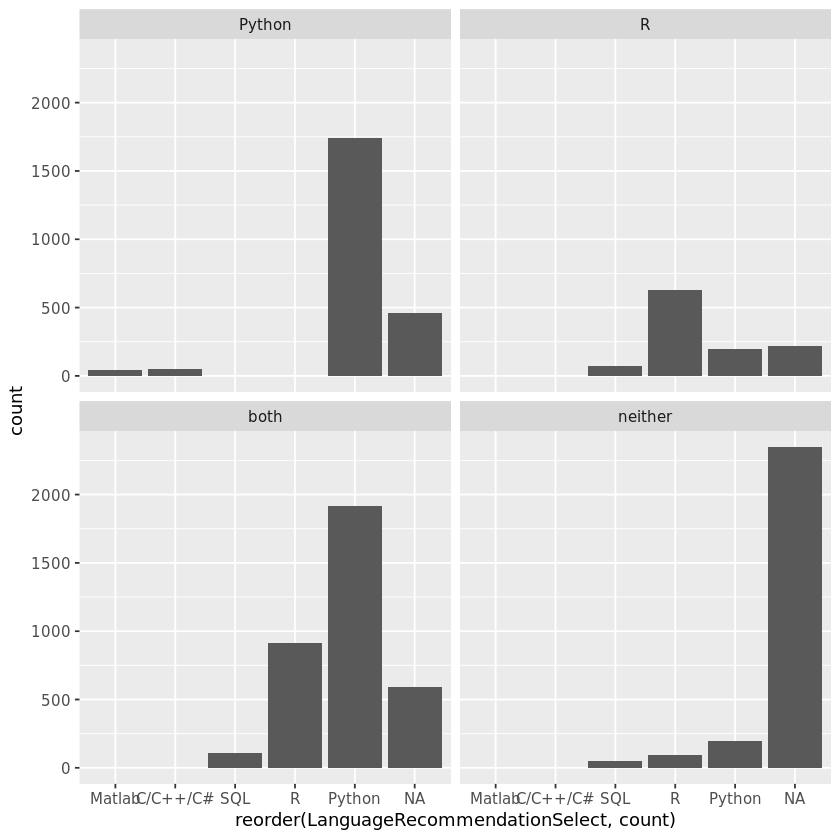

In [189]:
# Creating a faceted bar plot
ggplot(recommendations, aes(reorder(LanguageRecommendationSelect,count), count))+
    geom_bar(stat = "identity")+
    facet_wrap(~language_preference)

## 9. The moral of the story
<p>So we've made it to the end. We've found that Python is the most popular language used among Kaggle data scientists, but R users aren't far behind. And while Python users may highly recommend that new learners learn Python, would R users find the following statement <code>TRUE</code> or <code>FALSE</code>? </p>

In [191]:
# Would R users find this statement TRUE or FALSE?
R_is_number_one = TRUE